- tips 데이터
    - 요일별 팁의 비율(bar)
    - 인원수별 팁의 비율(bar)

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus']=False
import seaborn as sns
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [30]:
tips['tip_pct'] = (tips.tip/ tips.total_bill * 100).round(2)
tips.tail()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
239,29.03,5.92,Male,No,Sat,Dinner,3,20.39
240,27.18,2.00,Female,Yes,Sat,Dinner,2,7.36
241,22.67,2.00,Male,Yes,Sat,Dinner,2,8.82
242,17.82,1.75,Male,No,Sat,Dinner,2,9.82
243,18.78,3.00,Female,No,Thur,Dinner,2,15.97


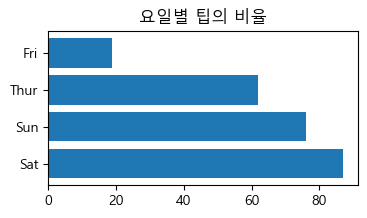

In [11]:
s =tips['day'].value_counts()
plt.figure(figsize=(4,2))
plt.barh(s.index,s.values)
plt.title('요일별 팁의 비율')
plt.show()

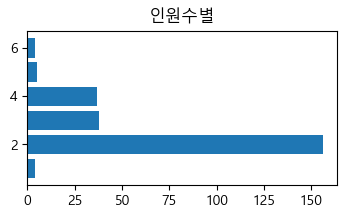

In [17]:
s=tips['size'].value_counts()
plt.figure(figsize=(4,2))
plt.barh(s.index,s.values)
plt.title('인원수별')
plt.show()

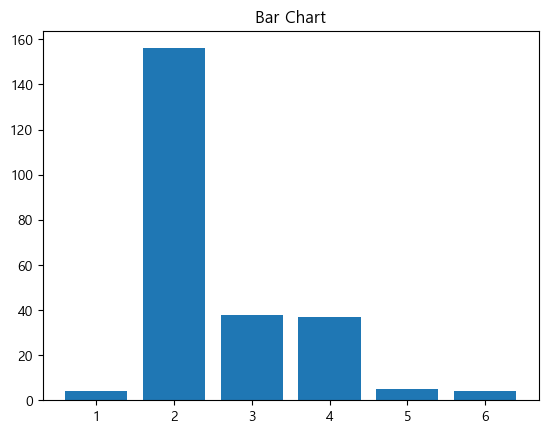

In [36]:
y, x = tips['size'].value_counts().values, tips['size'].value_counts().index
plt.title('Bar Chart')
plt.bar(x, y)
plt.show()

Anscombe 데이터

In [44]:
ans = sns.load_dataset('anscombe')
ans.head(10)

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


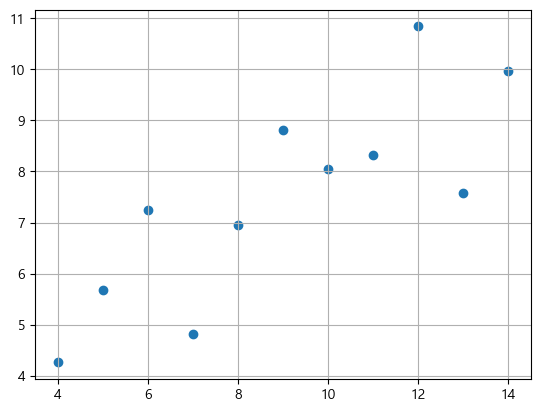

In [54]:
dataset_1 = ans[ans['dataset'] == 'I']
plt.scatter(dataset_1['x'], dataset_1['y'])
plt.grid()
plt.show()

In [56]:
dataset_1 = ans[ans['dataset'] == 'I']
plt.plot(crim,pred1,label = "result")    
plt.plot(dataset_1['x'], dataset_1['y'])
plt.grid()
plt.show()

NameError: name 'df' is not defined

In [41]:
ans[11:22]

,dataset,x,y
11,II,10.0,9.14
12,II,8.0,8.14
13,II,13.0,8.74
14,II,9.0,8.77
15,II,11.0,9.26
16,II,14.0,8.10
17,II,6.0,6.13
18,II,4.0,3.10
19,II,12.0,9.13
20,II,7.0,7.26


In [42]:
ans[22:32]

,dataset,x,y
22,III,10.0,7.46
23,III,8.0,6.77
24,III,13.0,12.74
25,III,9.0,7.11
26,III,11.0,7.81
27,III,14.0,8.84
28,III,6.0,6.08
29,III,4.0,5.39
30,III,12.0,8.15
31,III,7.0,6.42


In [43]:
ans.tail(10)

,dataset,x,y
34,IV,8.0,5.76
35,IV,8.0,7.71
36,IV,8.0,8.84
37,IV,8.0,8.47
38,IV,8.0,7.04
39,IV,8.0,5.25
40,IV,19.0,12.50
41,IV,8.0,5.56
42,IV,8.0,7.91
43,IV,8.0,6.89
